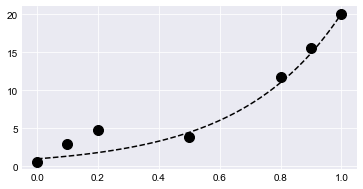

In [12]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

f = lambda x: np.exp(3 * x)

# generate the values along the curve on [0,2]
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

# generate data points within [0, 1]. use the function f and add some Gaussian noise
x = np.array([0, .1, .2, .5, .8, .9, 1.])
y = np.array([0.59837698, 2.90450025, 4.73684354, 3.87158063, 11.77734608, 15.51112358, 20.08663964])

plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);



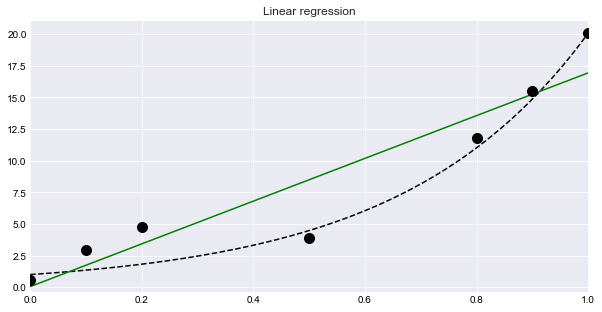

In [32]:
# now use scikit-learn to fit a linear model to the data.
# there are three steps. 
# First, we create the model (an instance of the LinearRegression class)
lr = lm.LinearRegression()

# Second: Then we fit the model to our data. We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);

# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

plt.figure(figsize=(10, 5))
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_tr, y_lr, 'g')
plt.plot(x, y, 'ok', ms=10)
plt.xlim(0, 1)
plt.ylim(y.min() - 1, y.max() + 1)
plt.title("Linear regression")

22.32-5.420.00
-100.27141.5450.14-110.3238.390.00


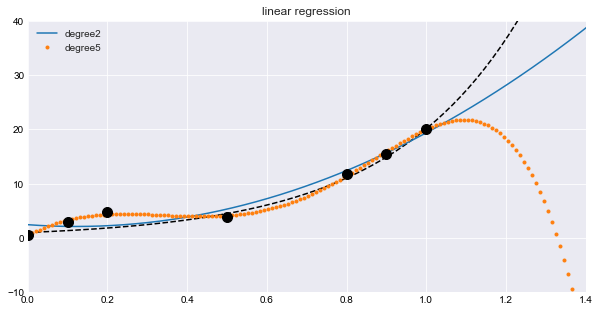

In [35]:
# linear fit is not well adapted because the data points are generated according to a non-linear model
# Therefore, going to fit a non-linear model. More precisely, we will fit a polynomial function to our data points.

lrp = lm.LinearRegression()
plt.figure(figsize=(10, 5))
plt.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp, s, label='degree' + str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
    
    # print the model's coefficients
    print(''.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10)
plt.title("linear regression")

10.995.370.00
3.883.913.663.063.360.00


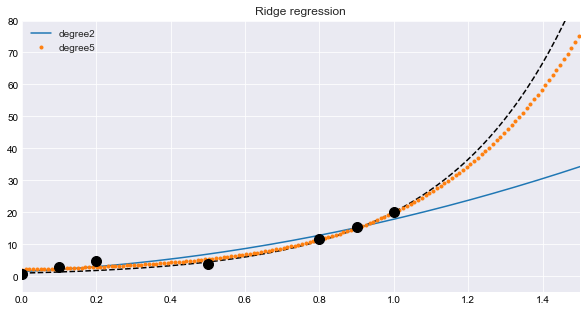

In [37]:
ridge = lm.RidgeCV()
plt.figure(figsize=(10,5))
plt.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_ridge, s, label='degree' + str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.5)
    plt.ylim(-5, 80)
    
    # print the model's coefficients
    print(''.join(['%.2f' % c for c in ridge.coef_]))

plt.plot(x, y, 'ok', ms=10)
plt.title("Ridge regression")

In [50]:
np.vander([1,2,3,4,5], 5)

array([[  1,   1,   1,   1,   1],
       [ 16,   8,   4,   2,   1],
       [ 81,  27,   9,   3,   1],
       [256,  64,  16,   4,   1],
       [625, 125,  25,   5,   1]])